# NOTAM Analysis

Please note that the data for this analysis is saved locally in a `data` folder that is one level above (a parent folder) to where the [GitHub](https://github.com/DAEN-Team-1/Final "GitHub") files have been saved. This was done because a lot of the data files are too large to be included in the GitHub repoo.

In [1]:
# imports
import pandas as pd

In [11]:
# read data
df = pd.read_csv('../data/notams_v3.csv', on_bad_lines='skip', encoding='utf-16', sep='\t')

/var/folders/wk/_x7mg1g17x70jm9czv01yk_r0000gp/T/ipykernel_47744/670382577.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/notams_v3.csv', on_bad_lines='skip', encoding='utf-16', sep='\t')


Look at first few rows of data

In [14]:
df.head()

LAUNCHES_REC_ID          LAUNCH_DATE              VEHICLE_NAME PAD_NAME  \
0               1  2013-01-05 00:00:00                STIG-B III      NaN   
1               2  2013-01-26 22:00:00  Ground Based Interceptor    LF-23   
2               3  2013-01-26 22:50:00    Terrier Improved Orion     LA-2   
3               4  2013-01-31 01:48:00               Atlas 5-401   SLC-41   
4               5  2013-02-01 06:56:00            Zenit 3SL/DMSL  Odyssey   

       PAYLOAD                          AGENCY                      PURPOSE  \
0   Scientific             Armadillo Aerospace                          NaN   
1          NaN          Missile Defense Agency  Anti-ballistic missile test   
2          NaN                            NASA      Atmospheric Experiments   
3       TDRS-K          United Launch Alliance               Communications   
4  Intelsat 27  Energia Logistics, Ltd. (ELUS)               Communications   

       ORBIT_TYPE      OUTCOME SPACE_LAUNCH_REPORT_FLAG GUNTER_FLAG  \
0             NaN      Failure                    False       False   
1     Sub-orbital   Successful                    False       False   
2     Sub-orbital   Successful                    False       False   
3  Geosynchronous  Operational                     True        True   
4             NaN      Failure                     True        True   

  SPACE_FLIGHT_NOW_FLAG NOONAN_FLAG AST_FLAG WIKIPEDIA_FLAG JSR_FLAG  \
0                 False       False     True          False     True   
1                 False       False    False           True     True   
2                 False       False    False           True     True   
3                  True       False    False           True     True   
4                  True       False     True           True    False   

  SPACEPORT_REC_ID  
0             19.0  
1             23.0  
2              9.0  
3              2.0  
4              NaN

Get information on the dataframe
* 1,062,863 rows
* 17 columns
* Datatypes seem to all be strings > will need to be updated
* Aside from `LAUNCHES_REC_ID`, most columns have only a few hundred non-null entries, suggesting that the data is very sparse

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062863 entries, 0 to 1062862
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   LAUNCHES_REC_ID           1062863 non-null  object
 1   LAUNCH_DATE               616 non-null      object
 2   VEHICLE_NAME              616 non-null      object
 3   PAD_NAME                  367 non-null      object
 4   PAYLOAD                   285 non-null      object
 5   AGENCY                    559 non-null      object
 6   PURPOSE                   325 non-null      object
 7   ORBIT_TYPE                318 non-null      object
 8   OUTCOME                   559 non-null      object
 9   SPACE_LAUNCH_REPORT_FLAG  547 non-null      object
 10  GUNTER_FLAG               550 non-null      object
 11  SPACE_FLIGHT_NOW_FLAG     537 non-null      object
 12  NOONAN_FLAG               537 non-null      object
 13  AST_FLAG                  535 non-null    

Get summary stats

In [12]:
df.describe()

LAUNCHES_REC_ID                                        LAUNCH_DATE  \
count          1062863                                                616   
unique         1062863                                                564   
top                  1  CLSD NORTH OF NUCAR, EXPECT NOBND RERTE VIA GT...   
freq                 1                                                  6   

         VEHICLE_NAME PAD_NAME  \
count             616      367   
unique            170       80   
top     Falcon 9 v1.2   SLC-40   
freq               80       57   

                                                  PAYLOAD  AGENCY  \
count                                                 285     559   
unique                                                244      62   
top     CLSD NORTH OF ILIDO L463    RTS NORTH OF NUCAR...  SpaceX   
freq                                                    6     130   

               PURPOSE ORBIT_TYPE     OUTCOME SPACE_LAUNCH_REPORT_FLAG  \
count              325        318         559                      547   
unique              62         52          66                       18   
top     Communications  Low Earth  Successful                    False   
freq                80         96         305                      340   

       GUNTER_FLAG SPACE_FLIGHT_NOW_FLAG NOONAN_FLAG AST_FLAG WIKIPEDIA_FLAG  \
count          550                   537         537      535            535   
unique          25                    12          12       13             19   
top          False                 False       False    False          False   
freq           350                   338         433      357            300   

       JSR_FLAG  SPACEPORT_REC_ID  
count       523             460.0  
unique        7              18.0  
top        True               2.0  
freq        447             123.0

Examine column by column

There seems to be an issue after index 518 
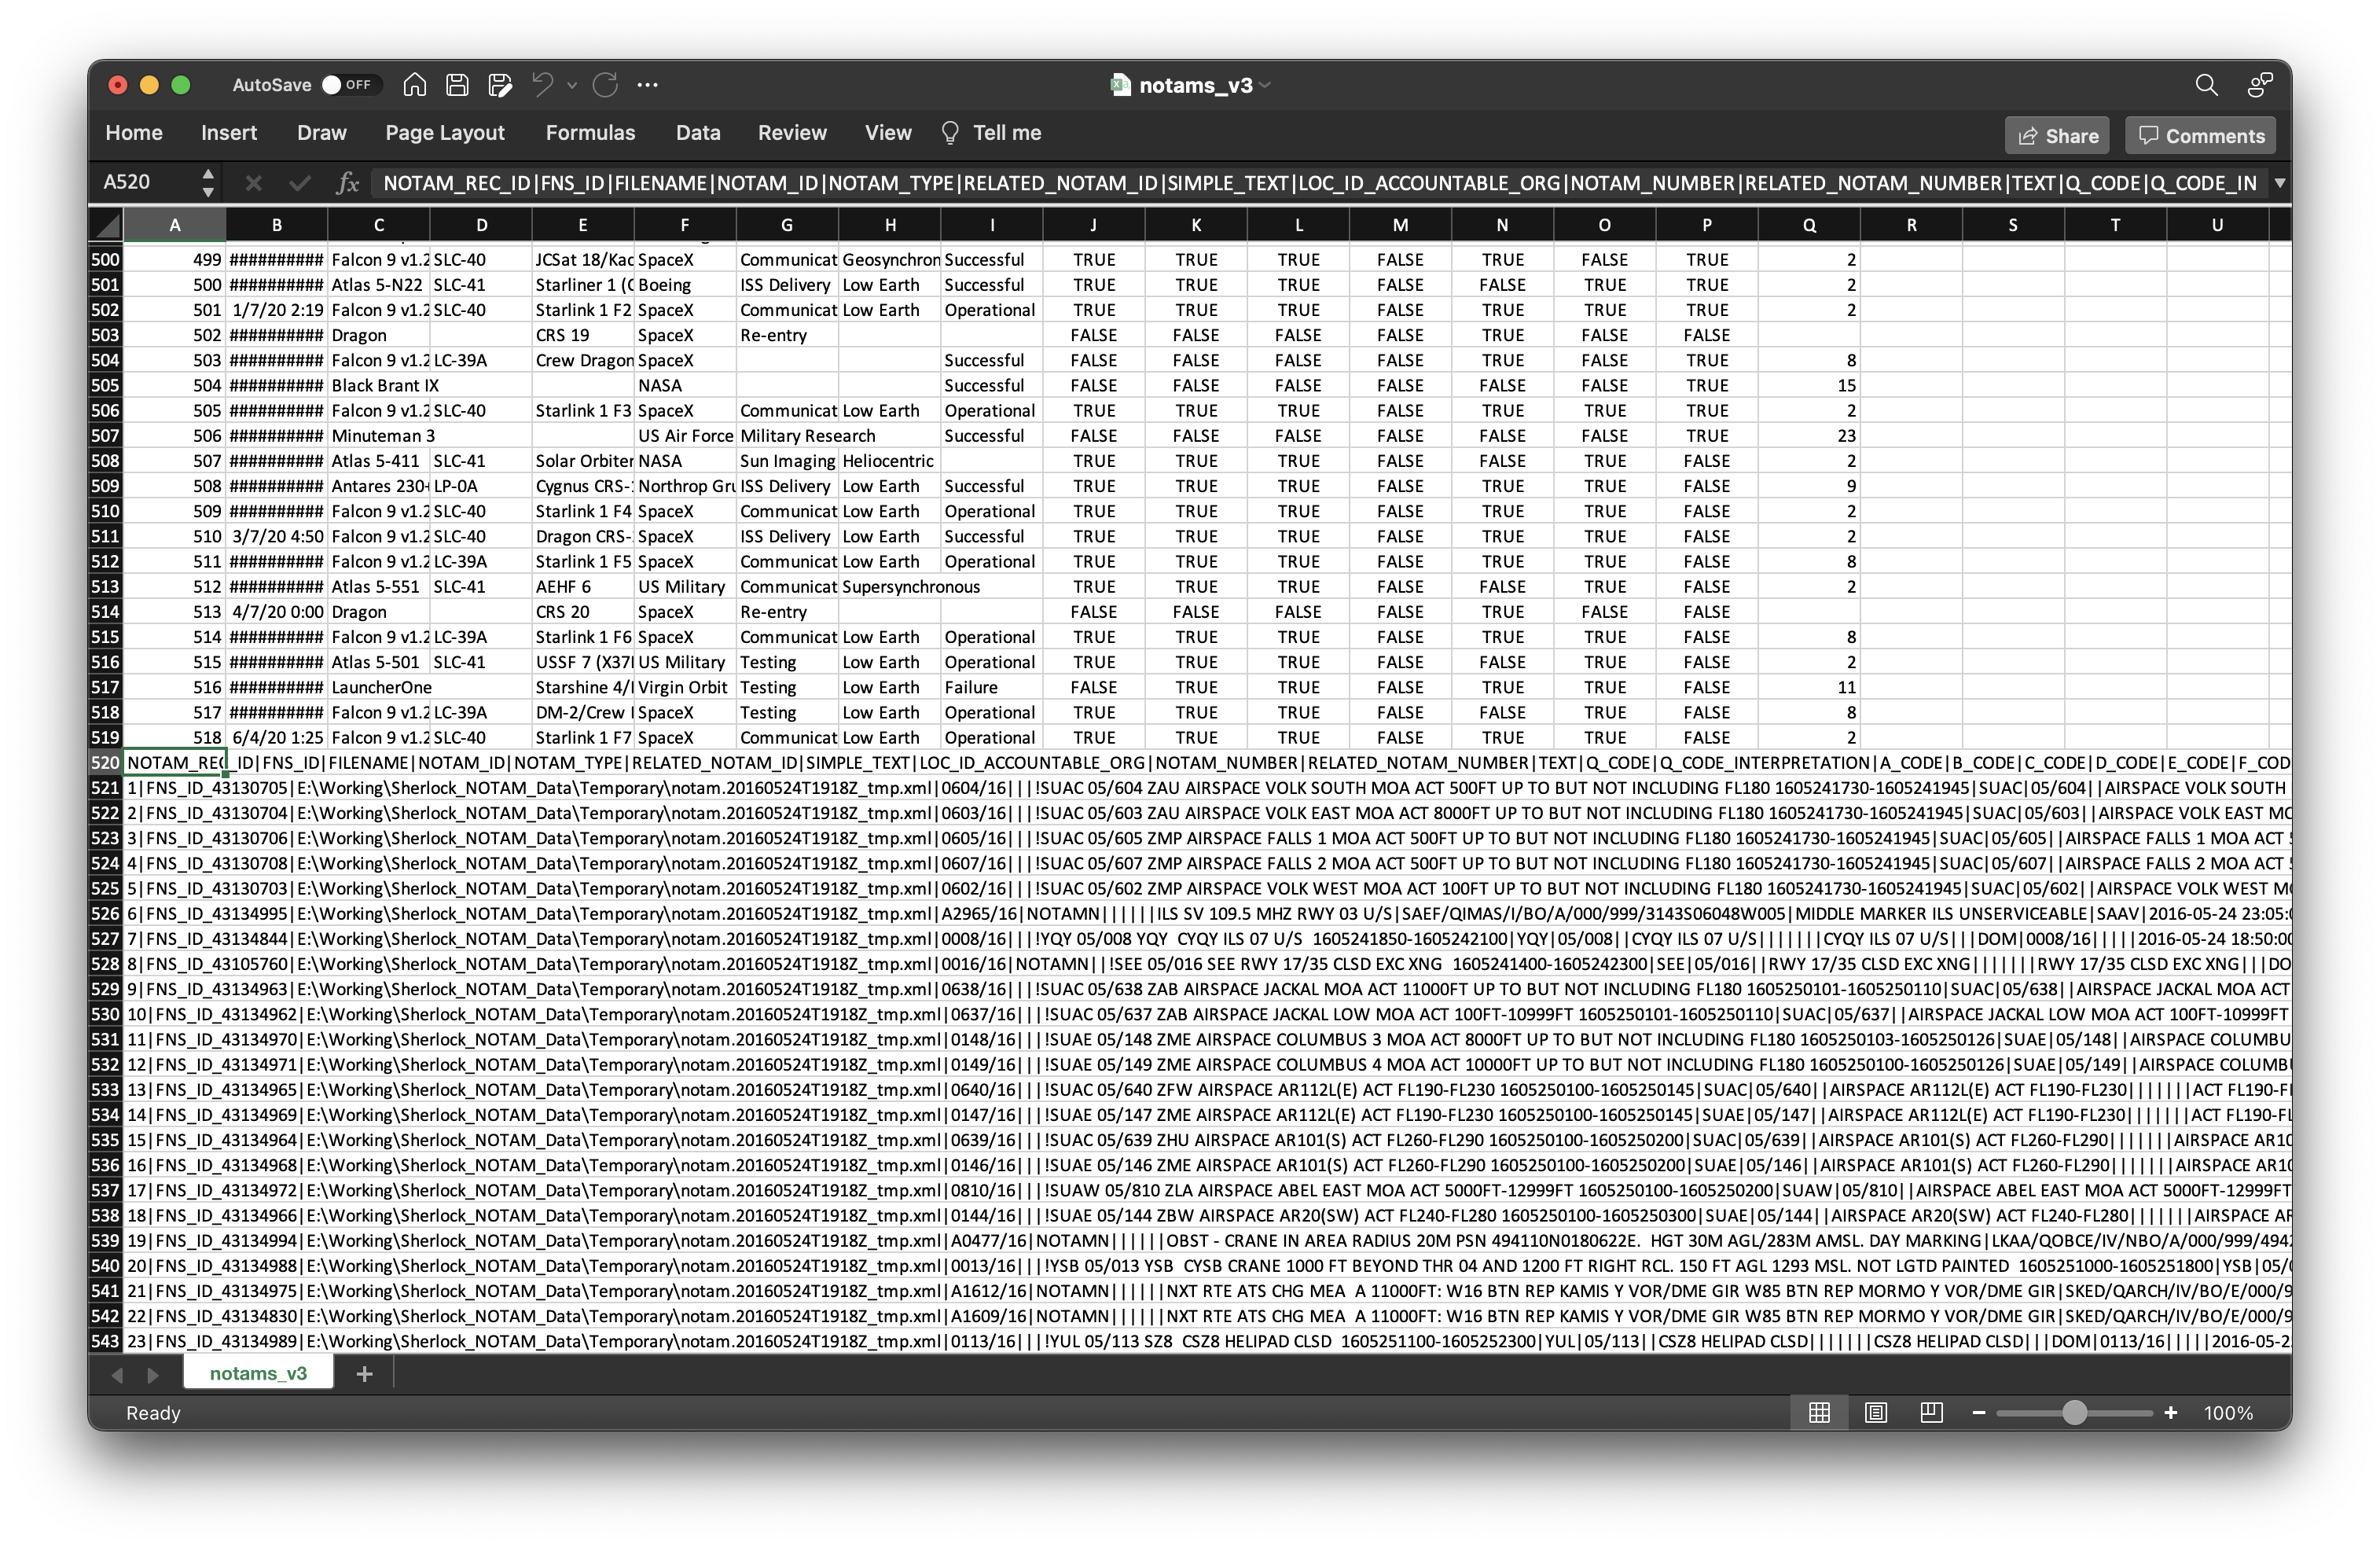

Look at sample entry that looks normal

In [16]:
df.iloc[517]

LAUNCHES_REC_ID                             518
LAUNCH_DATE                 2020-06-04 01:25:33
VEHICLE_NAME                      Falcon 9 v1.2
PAD_NAME                                 SLC-40
PAYLOAD                           Starlink 1 F7
AGENCY                                   SpaceX
PURPOSE                          Communications
ORBIT_TYPE                            Low Earth
OUTCOME                             Operational
SPACE_LAUNCH_REPORT_FLAG                   True
GUNTER_FLAG                                True
SPACE_FLIGHT_NOW_FLAG                      True
NOONAN_FLAG                               False
AST_FLAG                                   True
WIKIPEDIA_FLAG                             True
JSR_FLAG                                  False
SPACEPORT_REC_ID                            2.0
Name: 517, dtype: object

Look at sample entry that looks off

In [15]:
df.iloc[518]

LAUNCHES_REC_ID             NOTAM_REC_ID|FNS_ID|FILENAME|NOTAM_ID|NOTAM_TY...
LAUNCH_DATE                                                               NaN
VEHICLE_NAME                                                              NaN
PAD_NAME                                                                  NaN
PAYLOAD                                                                   NaN
AGENCY                                                                    NaN
PURPOSE                                                                   NaN
ORBIT_TYPE                                                                NaN
OUTCOME                                                                   NaN
SPACE_LAUNCH_REPORT_FLAG                                                  NaN
GUNTER_FLAG                                                               NaN
SPACE_FLIGHT_NOW_FLAG                                                     NaN
NOONAN_FLAG                                                     

NOTAM_REC_ID|FNS_ID|FILENAME|NOTAM_ID|NOTAM_TYPE|RELATED_NOTAM_ID|SIMPLE_TEXT|LOC_ID_ACCOUNTABLE_ORG|NOTAM_NUMBER|RELATED_NOTAM_NUMBER|TEXT|Q_CODE|Q_CODE_INTERPRETATION|A_CODE|B_CODE|C_CODE|D_CODE|E_CODE|F_CODE|G_CODE|CLASSIFICATION|POSSIBLE_NOTAM_ID|MIN_ALT|MAX_ALT|MIN_ALT_REF_TYPE|MAX_ALT_REF_TYPE|POSSIBLE_START_DATE|POSSIBLE_END_DATE|ISSUE_DATE|CANCELED_DATE|AFFECTED_FIR|DESIGNATOR|DESIGNATOR_NAME|LOCATION_NAME|ACCOUNT_ID|LOCATION_CODE|LAUNCHES_REC_ID

There seems to be several issues (perhaps just missing data) after index 518
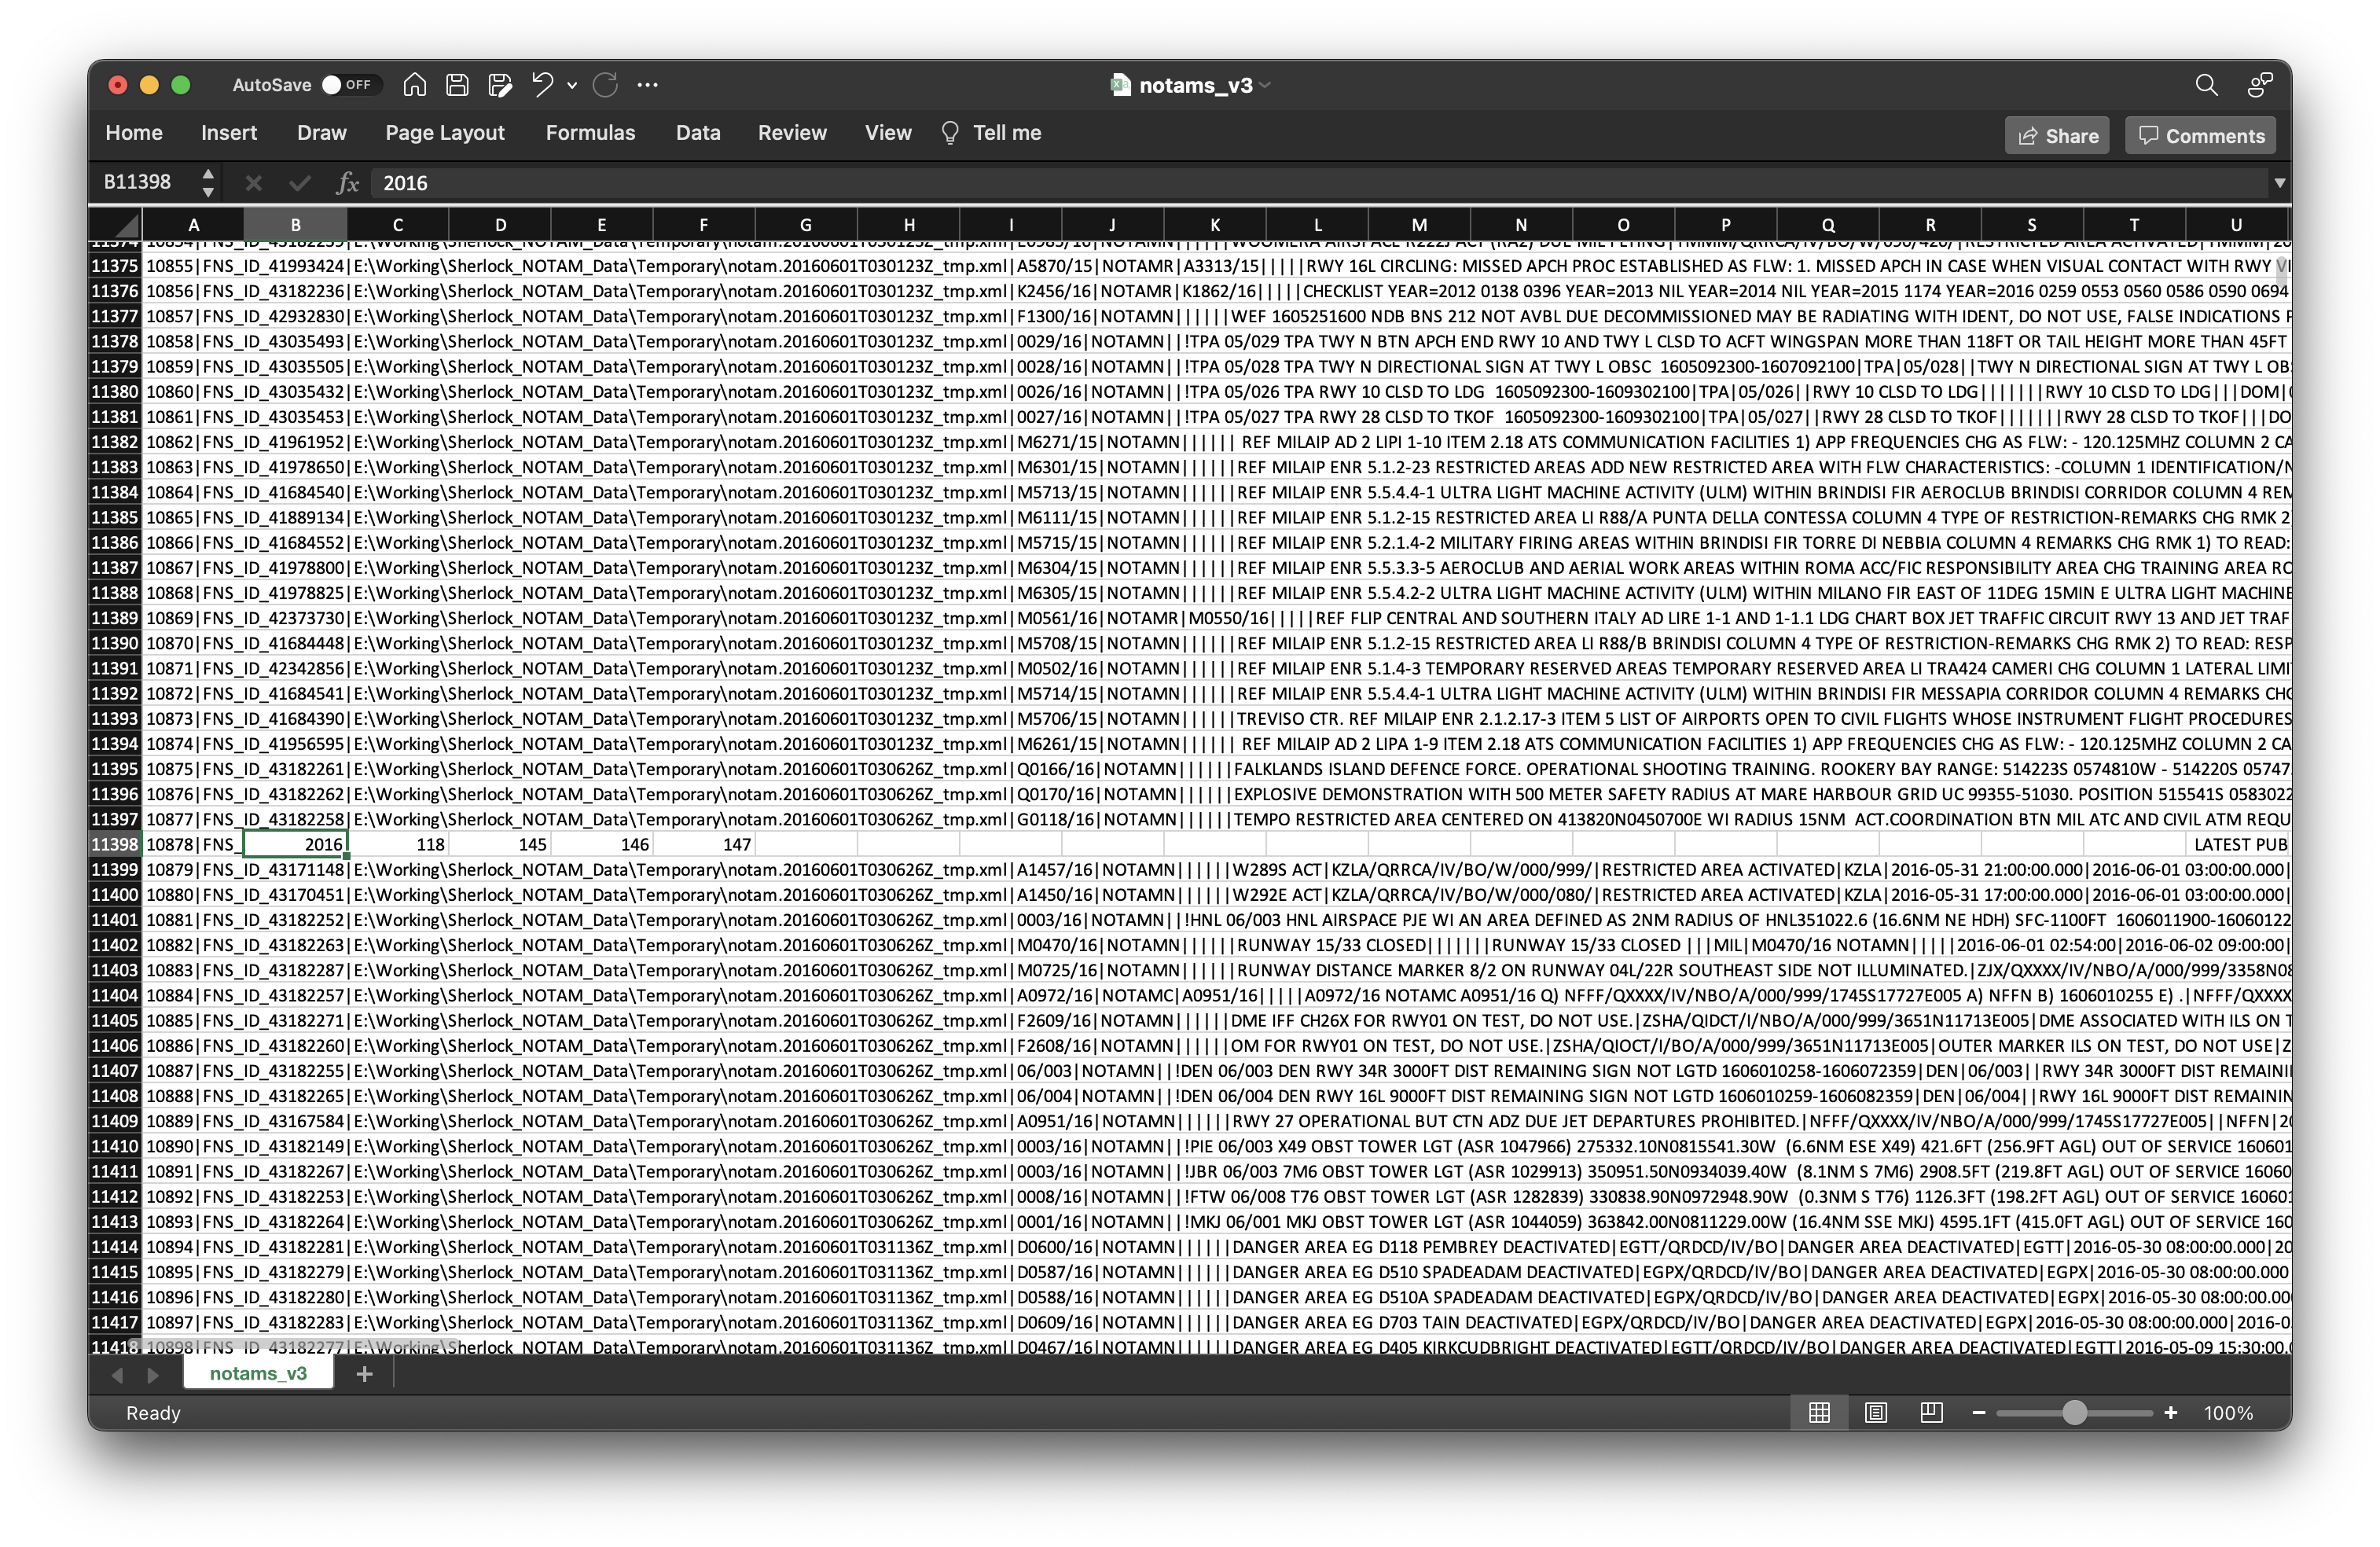
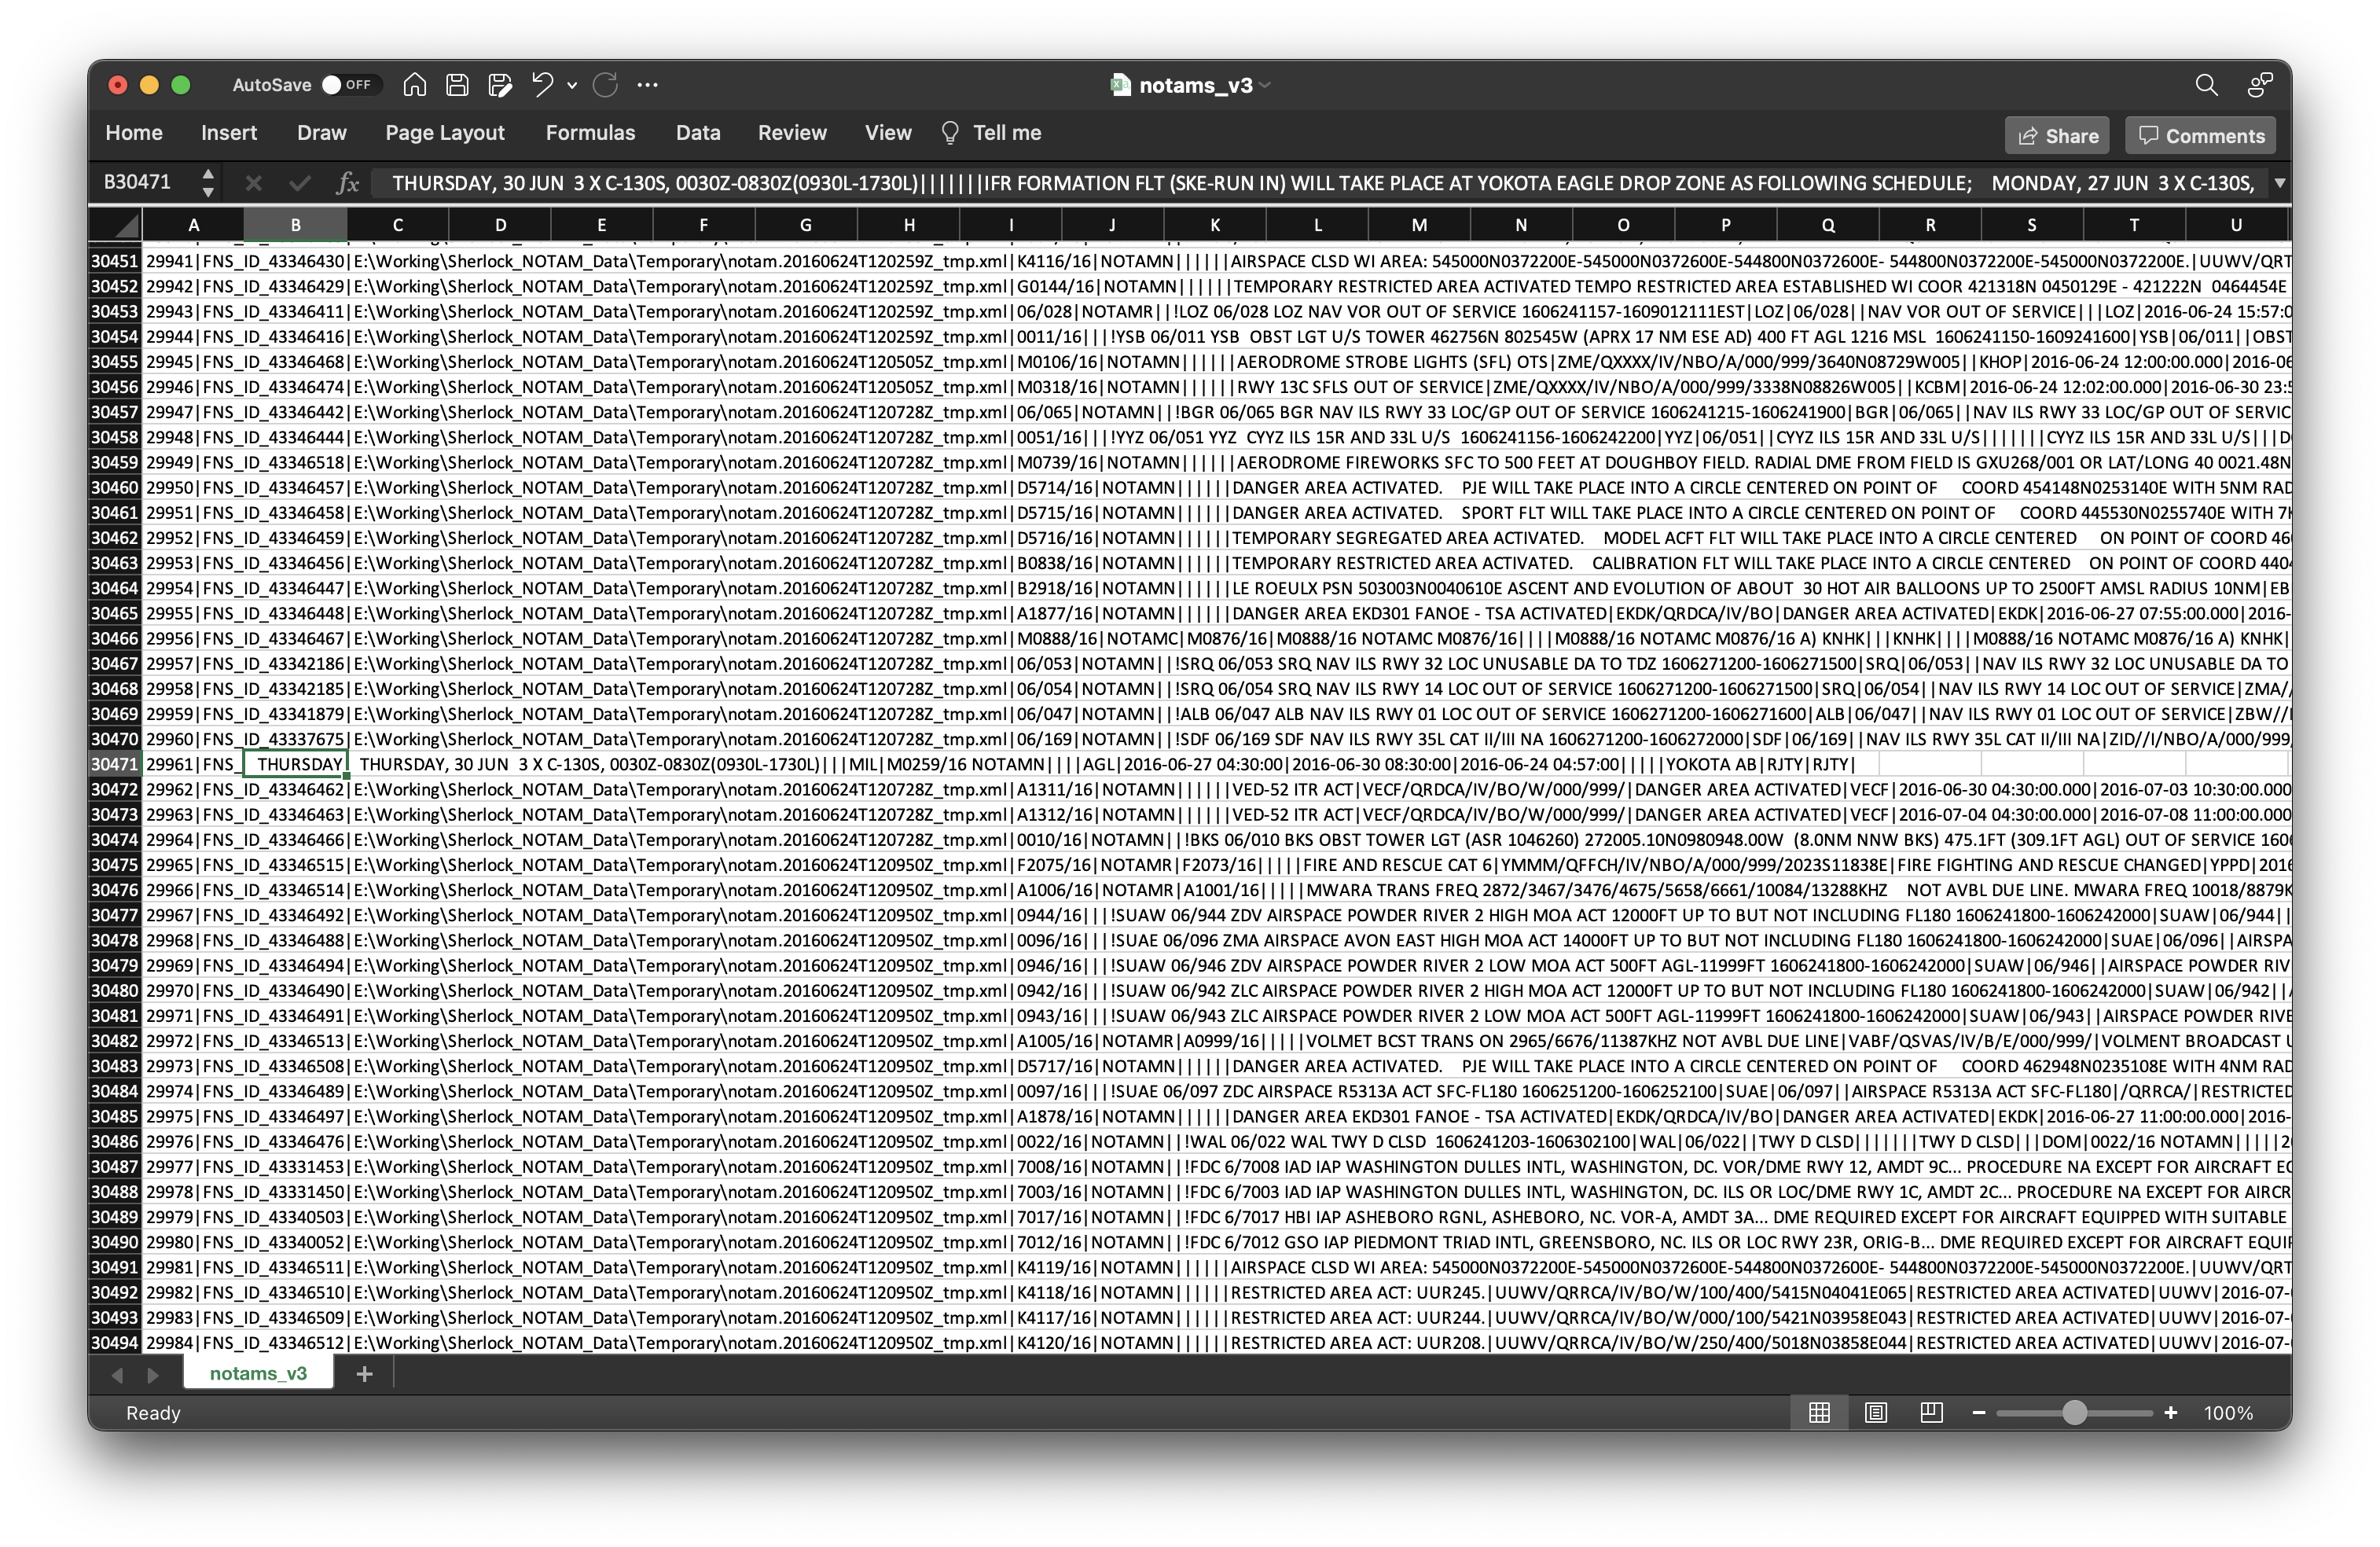

## Analysis of first 517 indexes (the _"normal"_ data)

In [25]:
# Create dataframe with just "normal" data
df_norm = df[:518].copy()

Look at first few rows of data

In [26]:
df_norm.head()

LAUNCHES_REC_ID          LAUNCH_DATE              VEHICLE_NAME PAD_NAME  \
0               1  2013-01-05 00:00:00                STIG-B III      NaN   
1               2  2013-01-26 22:00:00  Ground Based Interceptor    LF-23   
2               3  2013-01-26 22:50:00    Terrier Improved Orion     LA-2   
3               4  2013-01-31 01:48:00               Atlas 5-401   SLC-41   
4               5  2013-02-01 06:56:00            Zenit 3SL/DMSL  Odyssey   

       PAYLOAD                          AGENCY                      PURPOSE  \
0   Scientific             Armadillo Aerospace                          NaN   
1          NaN          Missile Defense Agency  Anti-ballistic missile test   
2          NaN                            NASA      Atmospheric Experiments   
3       TDRS-K          United Launch Alliance               Communications   
4  Intelsat 27  Energia Logistics, Ltd. (ELUS)               Communications   

       ORBIT_TYPE      OUTCOME SPACE_LAUNCH_REPORT_FLAG GUNTER_FLAG  \
0             NaN      Failure                    False       False   
1     Sub-orbital   Successful                    False       False   
2     Sub-orbital   Successful                    False       False   
3  Geosynchronous  Operational                     True        True   
4             NaN      Failure                     True        True   

  SPACE_FLIGHT_NOW_FLAG NOONAN_FLAG AST_FLAG WIKIPEDIA_FLAG JSR_FLAG  \
0                 False       False     True          False     True   
1                 False       False    False           True     True   
2                 False       False    False           True     True   
3                  True       False    False           True     True   
4                  True       False     True           True    False   

  SPACEPORT_REC_ID  
0             19.0  
1             23.0  
2              9.0  
3              2.0  
4              NaN

Get information on the dataframe
* 518 rows
* 17 columns
* Datatypes seem to all be strings > will need to be updated
* `PAD_NAME`, `PAYLOAD`, `AGENCY`, `PURPOSE`, `ORBIT_TYPE`, `OUTCOME`, and `SPACEPORT_REC_ID` all seem to have missing values

In [27]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   LAUNCHES_REC_ID           518 non-null    object
 1   LAUNCH_DATE               518 non-null    object
 2   VEHICLE_NAME              518 non-null    object
 3   PAD_NAME                  302 non-null    object
 4   PAYLOAD                   240 non-null    object
 5   AGENCY                    516 non-null    object
 6   PURPOSE                   284 non-null    object
 7   ORBIT_TYPE                267 non-null    object
 8   OUTCOME                   485 non-null    object
 9   SPACE_LAUNCH_REPORT_FLAG  518 non-null    object
 10  GUNTER_FLAG               518 non-null    object
 11  SPACE_FLIGHT_NOW_FLAG     518 non-null    object
 12  NOONAN_FLAG               518 non-null    object
 13  AST_FLAG                  518 non-null    object
 14  WIKIPEDIA_FLAG            

Get summary stats

In [28]:
df.describe()

LAUNCHES_REC_ID                                        LAUNCH_DATE  \
count          1062863                                                616   
unique         1062863                                                564   
top                  1  CLSD NORTH OF NUCAR, EXPECT NOBND RERTE VIA GT...   
freq                 1                                                  6   

         VEHICLE_NAME PAD_NAME  \
count             616      367   
unique            170       80   
top     Falcon 9 v1.2   SLC-40   
freq               80       57   

                                                  PAYLOAD  AGENCY  \
count                                                 285     559   
unique                                                244      62   
top     CLSD NORTH OF ILIDO L463    RTS NORTH OF NUCAR...  SpaceX   
freq                                                    6     130   

               PURPOSE ORBIT_TYPE     OUTCOME SPACE_LAUNCH_REPORT_FLAG  \
count              325        318         559                      547   
unique              62         52          66                       18   
top     Communications  Low Earth  Successful                    False   
freq                80         96         305                      340   

       GUNTER_FLAG SPACE_FLIGHT_NOW_FLAG NOONAN_FLAG AST_FLAG WIKIPEDIA_FLAG  \
count          550                   537         537      535            535   
unique          25                    12          12       13             19   
top          False                 False       False    False          False   
freq           350                   338         433      357            300   

       JSR_FLAG  SPACEPORT_REC_ID  
count       523             460.0  
unique        7              18.0  
top        True               2.0  
freq        447             123.0